In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import cv2 
import sys 
import glob
import random

%matplotlib inline
import matplotlib.pyplot as plt

import os
import math

sys.path.append('../utils')
sys.path.append('../models')
from dataloaders import *
from unet_blocks import *
from metrics_and_losses import *


import rasterio

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = 0
def w(v):
    if USE_CUDA:
        return v.cuda(DEVICE)
    return v

In [3]:
# model = torch.load('../weights/onera/3dconv_seg.pt')
model = w(UNetClassify(layers=6, init_filters=32, num_channels=13, fusion_method='mul', out_dim=1))
weights = torch.load('../../weights/onera/unet_siamese_prod_relu_inp64_13band_2dates_focal_hm_cnc_all_14_cities.pt',
                    map_location='cuda:0')
model.load_state_dict(weights)
model.eval()

UNetClassify(
  (down_layers): ModuleList(
    (0): UNetDownBlock(
      (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU()
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): UNetDownBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU()
      (pool): MaxPool2d(kernel_size=2, stride=2, pa

In [2]:
dataset = full_onera_loader('../../datasets/onera/', ['B01','B02', 'B03', 'B04','B05','B06','B07','B08','B8A','B09','B10','B11','B12'])

In [40]:
cities = list(dataset.keys())
cities.sort()

In [6]:
input_size = 64
for city in cities[10:]:
    img = dataset[city]['images']
    label = dataset[city]['labels']
    out = np.zeros((img.shape[2],img.shape[3]))
    
    for i in range(0,img.shape[2]//input_size):
        for j in range(0,img.shape[3]//input_size):
            if i*input_size + input_size < img.shape[2] and j*input_size + input_size < img.shape[3]:
                patch = np.transpose(img[:, : ,i*input_size:i*input_size+input_size, j*input_size:j*input_size+input_size], (1,0,2,3))
                inp1 = w(torch.from_numpy(np.asarray([patch[0]])))
                inp2 = w(torch.from_numpy(np.asarray([patch[1]])))
                logits = model(inp1, inp2)
#                 print (logits.min(),logits.max())
                pred = F.sigmoid(logits) > 0.5
                pred = pred.data.cpu().numpy()[0]
                out[i*input_size:i*input_size+input_size,j*input_size:j*input_size+input_size] = pred    
                
    rgb1 = cv2.merge([img[1][0], img[2][0], img[3][0]])
    rgb2 = cv2.merge([img[1][1], img[2][1], img[3][1]])
    
    

    plt.imshow(out)
    plt.show()
    plt.imshow(label)
    plt.show()
    

NameError: name 'cities' is not defined

In [11]:
test_cities = ['brasilia', 'chongqing', 'dubai', 'lasvegas', 'milano', 'montpellier', 'norcia', 'rio', 'saclay_w', 'valencia']
input_size = 64
cities_out = {}

(433, 469) (433, 469)


/usr/local/lib/python3.5/dist-packages/torch/nn/functional.py:1890: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.5/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


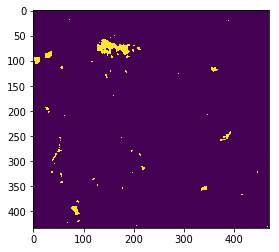

(730, 544) (730, 544)


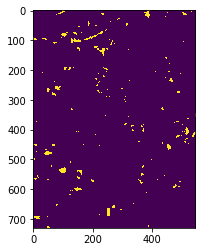

(774, 634) (774, 634)


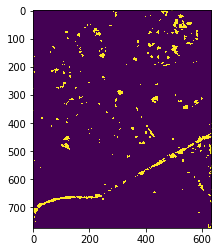

(824, 716) (824, 716)


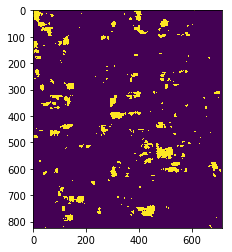

(545, 558) (545, 558)


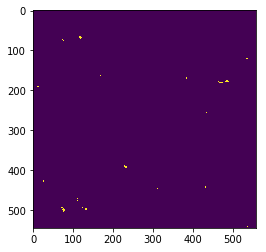

(426, 451) (426, 451)


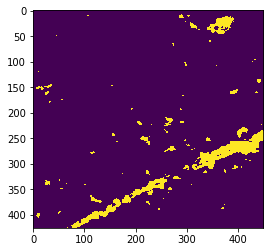

(241, 385) (241, 385)


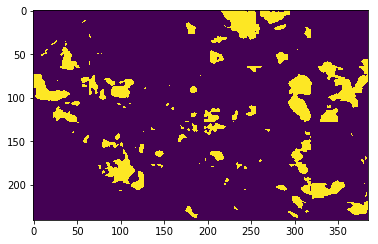

(353, 426) (353, 426)


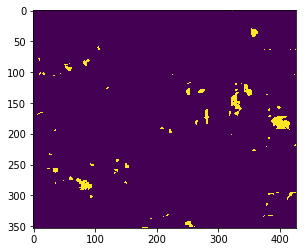

(639, 688) (631, 679)


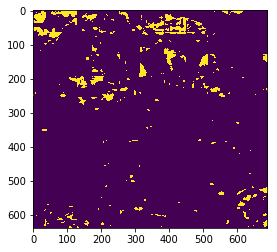

(458, 476) (458, 476)


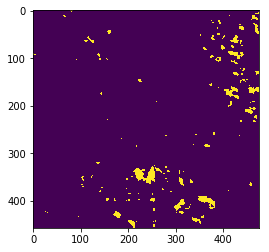

In [12]:
for city in test_cities:
    d1_bands = glob.glob('../../datasets/onera/images/'+ city +'/imgs_1/*.tif')
    d1_bands.sort()
    
    d1b1 = rasterio.open(d1_bands[0])
    d1b2 = rasterio.open(d1_bands[1])
    d1b3 = rasterio.open(d1_bands[2])
    d1b4 = rasterio.open(d1_bands[3])
    d1b5 = rasterio.open(d1_bands[4])
    d1b6 = rasterio.open(d1_bands[5])
    d1b7 = rasterio.open(d1_bands[6])
    d1b8 = rasterio.open(d1_bands[7])
    d1b8a = rasterio.open(d1_bands[8])
    d1b9 = rasterio.open(d1_bands[9])
    d1b10 = rasterio.open(d1_bands[10])
    d1b11 = rasterio.open(d1_bands[11])
    d1b12 = rasterio.open(d1_bands[12])
    
    d2_bands = glob.glob('../../datasets/onera/images/'+ city +'/imgs_2/*.tif')
    d2_bands.sort()
    
    d2b1 = rasterio.open(d2_bands[0])
    d2b2 = rasterio.open(d2_bands[1])
    d2b3 = rasterio.open(d2_bands[2])
    d2b4 = rasterio.open(d2_bands[3])
    d2b5 = rasterio.open(d2_bands[4])
    d2b6 = rasterio.open(d2_bands[5])
    d2b7 = rasterio.open(d2_bands[6])
    d2b8 = rasterio.open(d2_bands[7])
    d2b8a = rasterio.open(d2_bands[8])
    d2b9 = rasterio.open(d2_bands[9])
    d2b10 = rasterio.open(d2_bands[10])
    d2b11 = rasterio.open(d2_bands[11])
    d2b12 = rasterio.open(d2_bands[12])
    
    print (d1b2.shape, d2b2.shape)
    
    d1_b2 = d1b2.read()[0]
    d1_b1 = cv2.resize(d1b1.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d1_b3 = cv2.resize(d1b3.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d1_b4 = cv2.resize(d1b4.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d1_b5 = cv2.resize(d1b5.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d1_b6 = cv2.resize(d1b6.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d1_b7 = cv2.resize(d1b7.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d1_b8 = cv2.resize(d1b8.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d1_b8a = cv2.resize(d1b8a.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d1_b9 = cv2.resize(d1b9.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d1_b10 = cv2.resize(d1b10.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d1_b11 = cv2.resize(d1b11.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d1_b12 = cv2.resize(d1b12.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    
    d2_b2 = cv2.resize(d2b2.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b1 = cv2.resize(d2b1.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b3 = cv2.resize(d2b3.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b4 = cv2.resize(d2b4.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b5 = cv2.resize(d2b5.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b6 = cv2.resize(d2b6.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b7 = cv2.resize(d2b7.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b8 = cv2.resize(d2b8.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b8a = cv2.resize(d2b8a.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b9 = cv2.resize(d2b9.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b10 = cv2.resize(d2b10.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b11 = cv2.resize(d2b11.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    d2_b12 = cv2.resize(d2b12.read()[0], (d1_b2.shape[1], d1_b2.shape[0]))
    
    d2_b1 = match_band(d2_b1, d1_b1)
    d2_b2 = match_band(d2_b2, d1_b2)
    d2_b3 = match_band(d2_b3, d1_b3)
    d2_b4 = match_band(d2_b4, d1_b4)
    d2_b5 = match_band(d2_b5, d1_b5)
    d2_b6 = match_band(d2_b6, d1_b6)
    d2_b7 = match_band(d2_b7, d1_b7)
    d2_b8 = match_band(d2_b8, d1_b8)
    d2_b8a = match_band(d2_b8a, d1_b8a)
    d2_b9 = match_band(d2_b9, d1_b9)
    d2_b10 = match_band(d2_b10, d1_b10)
    d2_b11 = match_band(d2_b11, d1_b11)
    d2_b12 = match_band(d2_b12, d1_b12)
    
         
    d1_b1 = stretch_8bit(d1_b1, 2, 98).astype(np.float32)
    d1_b2 = stretch_8bit(d1_b2, 2, 98).astype(np.float32)
    d1_b3 = stretch_8bit(d1_b3, 2, 98).astype(np.float32)
    d1_b4 = stretch_8bit(d1_b4, 2, 98).astype(np.float32)
    d1_b5 = stretch_8bit(d1_b5, 2, 98).astype(np.float32)
    d1_b6 = stretch_8bit(d1_b6, 2, 98).astype(np.float32)
    d1_b7 = stretch_8bit(d1_b7, 2, 98).astype(np.float32)
    d1_b8 = stretch_8bit(d1_b8, 2, 98).astype(np.float32)
    d1_b8a = stretch_8bit(d1_b8a, 2, 98).astype(np.float32)
    d1_b9 = stretch_8bit(d1_b9, 2, 98).astype(np.float32)
    d1_b10 = stretch_8bit(d1_b10, 2, 98).astype(np.float32)
    d1_b11 = stretch_8bit(d1_b11, 2, 98).astype(np.float32)
    d1_b12 = stretch_8bit(d1_b12, 2, 98).astype(np.float32)

    d2_b1 = stretch_8bit(d2_b1, 2, 98).astype(np.float32)
    d2_b2 = stretch_8bit(d2_b2, 2, 98).astype(np.float32)
    d2_b3 = stretch_8bit(d2_b3, 2, 98).astype(np.float32)
    d2_b4 = stretch_8bit(d2_b4, 2, 98).astype(np.float32)
    d2_b5 = stretch_8bit(d2_b5, 2, 98).astype(np.float32)
    d2_b6 = stretch_8bit(d2_b6, 2, 98).astype(np.float32)
    d2_b7 = stretch_8bit(d2_b7, 2, 98).astype(np.float32)
    d2_b8 = stretch_8bit(d2_b8, 2, 98).astype(np.float32)
    d2_b8a = stretch_8bit(d2_b8a, 2, 98).astype(np.float32)
    d2_b9 = stretch_8bit(d2_b9, 2, 98).astype(np.float32)
    d2_b10 = stretch_8bit(d2_b10, 2, 98).astype(np.float32)
    d2_b11 = stretch_8bit(d2_b11, 2, 98).astype(np.float32)
    d2_b12 = stretch_8bit(d2_b12, 2, 98).astype(np.float32)
    
    img1 = np.asarray([d1_b1, d1_b2, d1_b3, d1_b4, d1_b5, d1_b6, d1_b7, d1_b8, d1_b8a, d1_b9, d1_b10, d1_b11, d1_b12]).astype(np.float32) / 255.
    img2 = np.asarray([d2_b1, d2_b2, d2_b3, d2_b4, d2_b5, d2_b6, d2_b7, d2_b8, d2_b8a, d2_b9, d2_b10, d2_b11, d2_b12]).astype(np.float32) / 255.

    out = np.zeros((img1.shape[1],img1.shape[2]))
    
    batches1 = []
    batches2 = []
    ijs = []
    for i in range(0,img1.shape[1],64):
        for j in range(0,img1.shape[2],64):
            if i+input_size <= img1.shape[1] and j+input_size <= img1.shape[2]:
                batches1.append(img1[:,i:i+input_size,j:j+input_size])
                batches2.append(img2[:,i:i+input_size,j:j+input_size])
                ijs.append([i,j])
            elif i+input_size>img1.shape[1] and j+input_size<=img1.shape[2]:
                batches1.append(img1[:,img1.shape[1]-input_size:img1.shape[1],j:j+input_size])
                batches2.append(img2[:,img2.shape[1]-input_size:img2.shape[1],j:j+input_size])
                ijs.append([img1.shape[1]-input_size,j])
            elif i+input_size<=img1.shape[1] and j+input_size>img1.shape[2]:
                batches1.append(img1[:,i:i+input_size,img1.shape[2]-input_size:img1.shape[2]])
                batches2.append(img2[:,i:i+input_size,img2.shape[2]-input_size:img2.shape[2]])
                ijs.append([i,img1.shape[2]-input_size])
            else:
                batches1.append(img1[:,img1.shape[1]-input_size:img1.shape[1],
                                     img1.shape[2]-input_size:img1.shape[2]])
                batches2.append(img2[:,img2.shape[1]-input_size:img2.shape[1],
                                     img2.shape[2]-input_size:img2.shape[2]])
                ijs.append([img1.shape[1]-input_size,img1.shape[2]-input_size])
                
            if len(batches1) == 1:
                inp1 = w(torch.from_numpy(np.asarray(batches1)))
                inp2 = w(torch.from_numpy(np.asarray(batches2)))
#                 print (inp1.size(),inp2.size())
                logits = model(inp1, inp2)
                pred = F.sigmoid(logits) > 0.5
                pred = pred.data.cpu().numpy()
                
                batches1 = []
                batches2 = []
                
                del inp1
                del inp2
                
                for c in range(len(ijs)):
                    out[ijs[c][0]:ijs[c][0]+input_size,ijs[c][1]:ijs[c][1]+input_size] = pred[c]
                    
                ijs = []
    
    cities_out[city] = out
    plt.imshow(out)
    plt.show()
    

In [9]:
for city in list(cities_out.keys()):
    new_dataset = rasterio.open('../../datasets/onera/results/' + city + '_focal_14dates_s64_13bands_inp64.tif', 'w', driver='GTiff', 
                                height=cities_out[city].shape[0], width=cities_out[city].shape[1], count=1, dtype=np.uint8)
    new_dataset.write(cities_out[city].astype(np.uint8) + 1, 1)
    new_dataset.close()

/usr/local/lib/python3.5/dist-packages/rasterio/__init__.py:253: NotGeoreferencedWarning: Dataset has no geotransform set. Default transform will be applied (Affine.identity())
  **kwargs)
